# 📊 Visualización de Datos en Ingeniería de Datos

## Objetivos de Aprendizaje

Al finalizar este notebook, serás capaz de:

1. ✅ Crear visualizaciones efectivas con **Matplotlib**
2. ✅ Usar **Seaborn** para análisis estadístico visual
3. ✅ Generar gráficos interactivos con **Plotly**
4. ✅ Diseñar dashboards básicos
5. ✅ Aplicar mejores prácticas de visualización de datos

---

## 1. Configuración Inicial

In [26]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de tamaño de figuras por defecto
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


### 🎨 Configuración de Bibliotecas de Visualización

**Librerías principales:**
- **Matplotlib:** base de visualización en Python, control granular sobre elementos gráficos
- **Seaborn:** construida sobre Matplotlib, estilos estadísticos elegantes
- **Plotly:** gráficos interactivos HTML para dashboards y exploración

**Configuración:**
- `%matplotlib inline`: muestra gráficos en notebooks
- `plt.style.use()`: aplica estilos predefinidos
- `rcParams`: parámetros globales (tamaño, fuentes)

**Mejora práctica:** Configurar estilos al inicio garantiza visualizaciones consistentes en todo el análisis.

## 2. Carga de Datos

In [27]:
# Cargar datasets
productos = pd.read_csv('../../datasets/raw/productos.csv')
clientes = pd.read_csv('../../datasets/raw/clientes.csv')
ventas = pd.read_csv('../../datasets/raw/ventas.csv')

# Convertir fechas
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'])
clientes['fecha_registro'] = pd.to_datetime(clientes['fecha_registro'])

print(f"📦 Productos: {len(productos)} registros")
print(f"👥 Clientes: {len(clientes)} registros")
print(f"💰 Ventas: {len(ventas)} registros")

# Vista previa
display(ventas.head())

📦 Productos: 30 registros
👥 Clientes: 30 registros
💰 Ventas: 50 registros


,venta_id,cliente_id,producto_id,cantidad,precio_unitario,total,fecha_venta,metodo_pago,estado
0,1,1,1,1,1299.99,1299.99,2024-01-15,tarjeta_credito,completado
1,2,2,3,2,79.99,159.98,2024-01-16,paypal,completado
2,3,3,5,1,349.99,349.99,2024-01-17,tarjeta_debito,completado
3,4,1,7,2,149.99,299.98,2024-01-18,tarjeta_credito,completado
4,5,4,4,1,129.99,129.99,2024-01-19,transferencia,completado


## 3. Matplotlib: Gráficos Básicos

Matplotlib es la biblioteca fundamental de visualización en Python.

### 3.1 Gráfico de Líneas - Evolución de Ventas

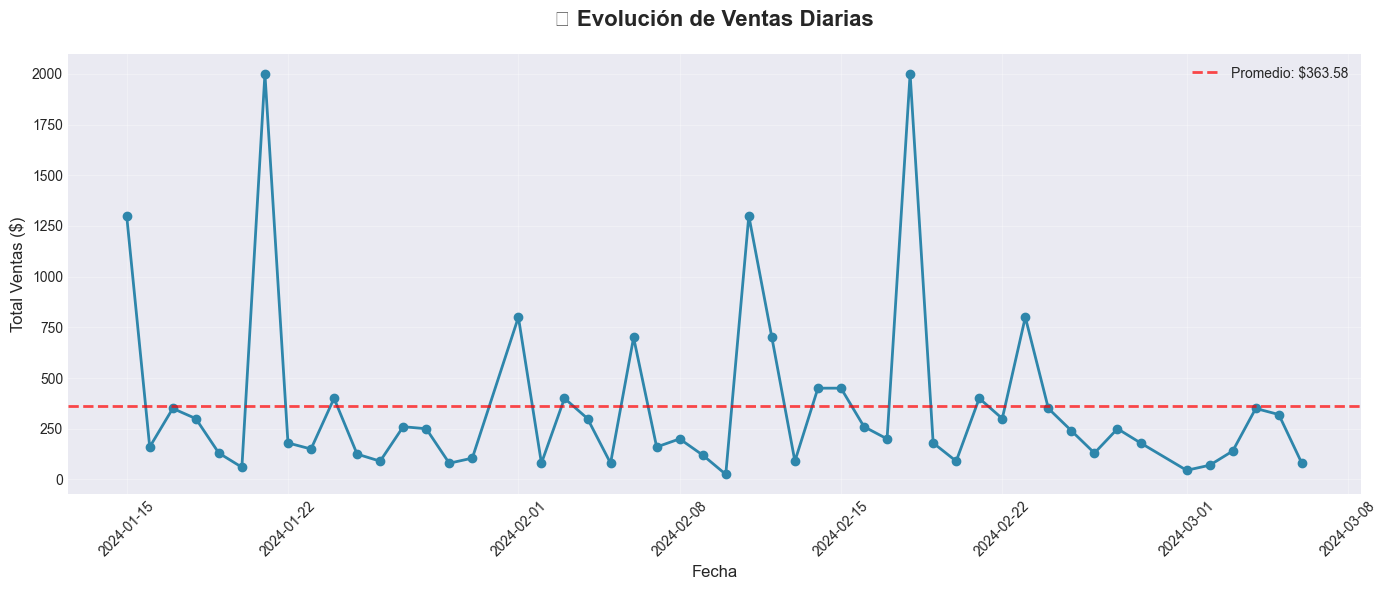

💵 Venta promedio diaria: $363.58
📊 Venta máxima: $1999.99
📉 Venta mínima: $24.99


In [8]:
# Agrupar ventas por fecha
ventas_diarias = ventas.groupby('fecha_venta')['total'].sum().reset_index()

# Crear gráfico
plt.figure(figsize=(14, 6))
plt.plot(ventas_diarias['fecha_venta'], ventas_diarias['total'], 
         marker='o', linestyle='-', linewidth=2, markersize=6, color='#2E86AB')

# Personalización
plt.title('📈 Evolución de Ventas Diarias', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Total Ventas ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Agregar línea de promedio
promedio = ventas_diarias['total'].mean()
plt.axhline(y=promedio, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Promedio: ${promedio:.2f}')
plt.legend()

plt.show()

print(f"💵 Venta promedio diaria: ${promedio:.2f}")
print(f"📊 Venta máxima: ${ventas_diarias['total'].max():.2f}")
print(f"📉 Venta mínima: ${ventas_diarias['total'].min():.2f}")

### 📈 Gráfico de Líneas: Series Temporales

**Concepto:** Los line plots muestran tendencias y evolución de métricas en el tiempo.

**Elementos clave:**
- `plt.plot()`: función principal para líneas
- `marker='o'`: puntos en cada valor
- `linestyle='-'`: tipo de línea (sólida, discontinua)
- `plt.axhline()`: línea horizontal de referencia (promedio, umbral)

**Cuándo usar:** Ventas diarias, métricas de rendimiento, KPIs temporales, series de tiempo.

**Insight:** La línea de promedio revela rápidamente días con rendimiento superior/inferior a la media.

### 3.2 Gráfico de Barras - Ventas por Categoría

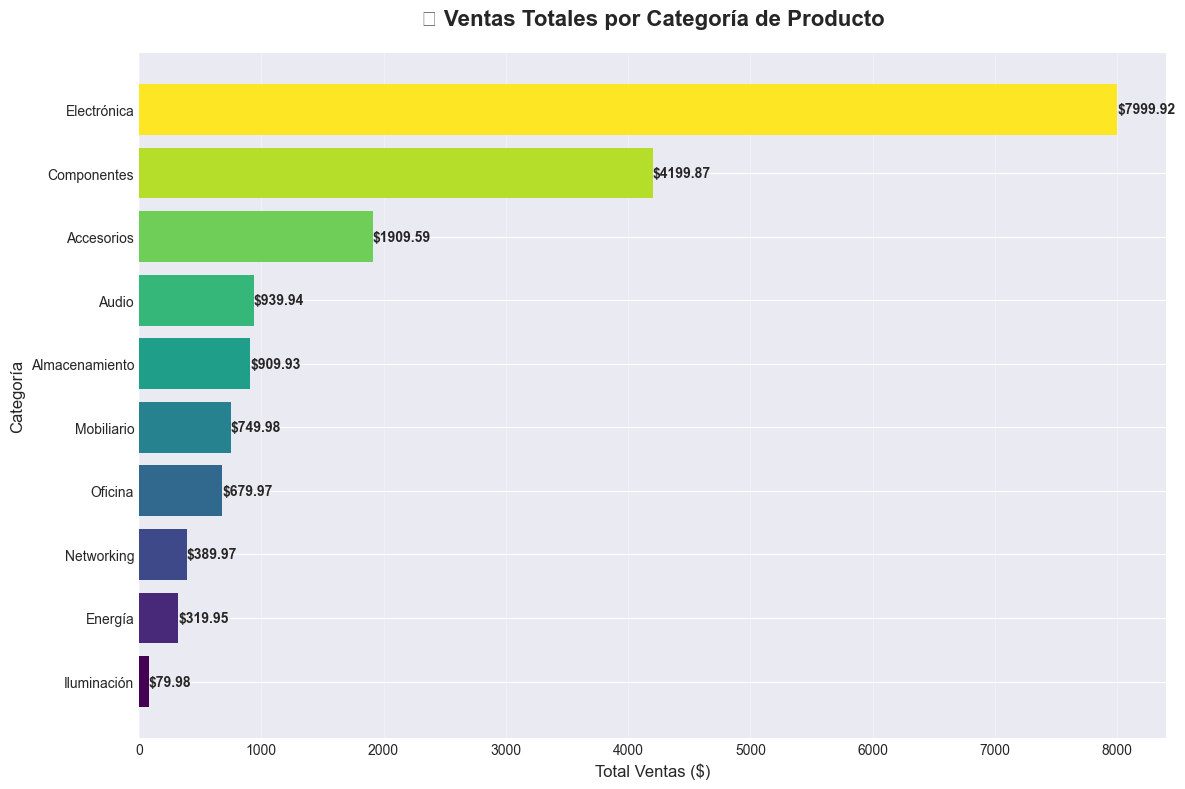


🏆 Top 3 Categorías:
1. Accesorios: $1909.59
2. Componentes: $4199.87
3. Electrónica: $7999.92


In [28]:
# Crear columna producto_id en productos basada en el índice (comenzando en 1)
productos_con_id = productos.copy()
productos_con_id['producto_id'] = range(1, len(productos_con_id) + 1)

# Merge para obtener categorías
ventas_productos = ventas.merge(productos_con_id, on='producto_id')

# Agrupar por categoría
ventas_categoria = ventas_productos.groupby('categoria')['total'].sum().sort_values(ascending=True)

# Crear gráfico horizontal
plt.figure(figsize=(12, 8))
colores = plt.cm.viridis(np.linspace(0, 1, len(ventas_categoria)))
bars = plt.barh(ventas_categoria.index, ventas_categoria.values, color=colores)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'${width:.2f}', 
             ha='left', va='center', fontweight='bold', fontsize=10)

plt.title('💼 Ventas Totales por Categoría de Producto', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Ventas ($)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🏆 Top 3 Categorías:")
for i, (cat, total) in enumerate(ventas_categoria.tail(3).items(), 1):
    print(f"{i}. {cat}: ${total:.2f}")

### 📊 Gráfico de Barras: Comparación de Categorías

**Concepto:** Bar plots comparan magnitudes entre categorías discretas.

**Variantes:**
- `plt.bar()`: barras verticales
- `plt.barh()`: barras horizontales (mejor para muchas categorías)

**Mejores prácticas:**
- Ordenar barras por valor facilita lectura
- Agregar valores en barras evita ambigüedad
- Colores diferenciados mejoran distinción visual

**Cuándo usar:** Rankings, comparación de grupos, distribución de variables categóricas.

### 3.3 Gráfico de Pastel - Distribución de Métodos de Pago

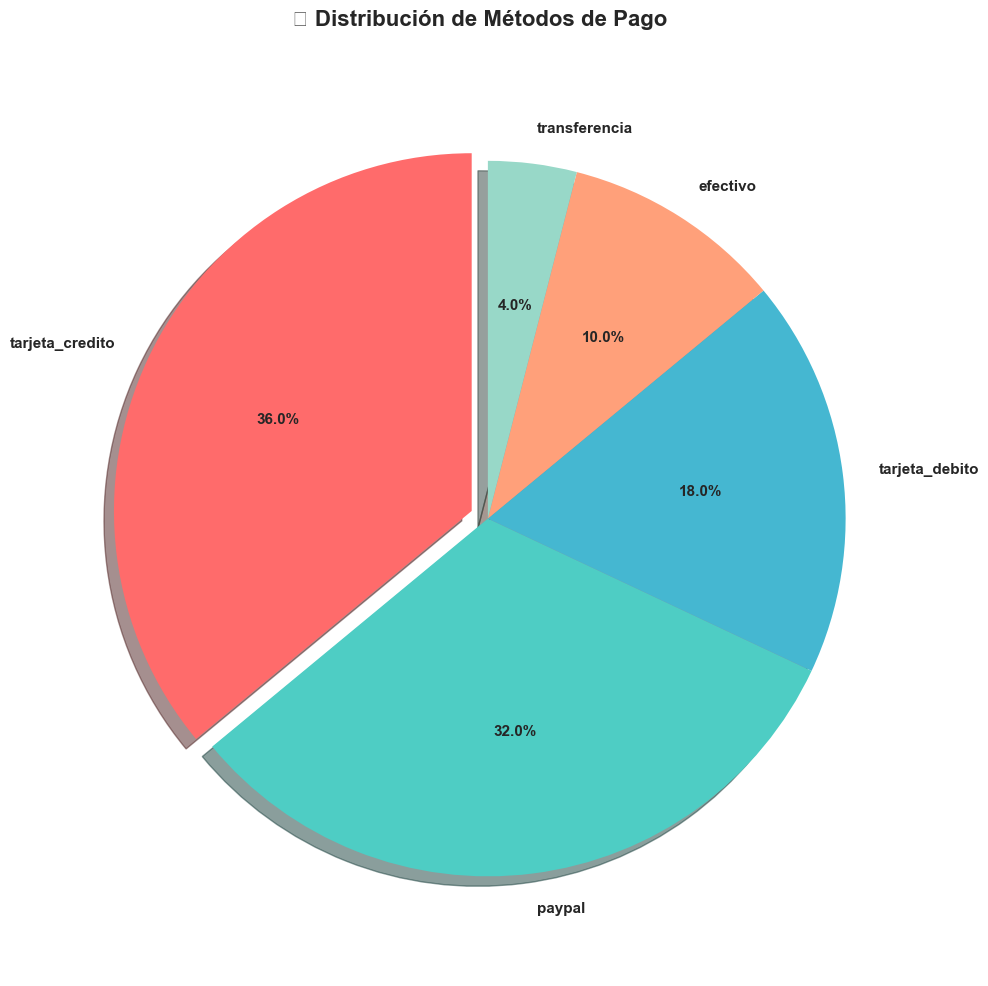


📊 Desglose de métodos de pago:
  • tarjeta_credito: 18 transacciones (36.0%)
  • paypal: 16 transacciones (32.0%)
  • tarjeta_debito: 9 transacciones (18.0%)
  • efectivo: 5 transacciones (10.0%)
  • transferencia: 2 transacciones (4.0%)


In [10]:
# Contar métodos de pago
metodos_pago = ventas['metodo_pago'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(10, 10))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
explode = [0.05 if i == 0 else 0 for i in range(len(metodos_pago))]

plt.pie(metodos_pago.values, 
        labels=metodos_pago.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'})

plt.title('💳 Distribución de Métodos de Pago', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n📊 Desglose de métodos de pago:")
for metodo, cantidad in metodos_pago.items():
    porcentaje = (cantidad / len(ventas)) * 100
    print(f"  • {metodo}: {cantidad} transacciones ({porcentaje:.1f}%)")

### 🥧 Gráfico de Pastel: Proporciones

**Concepto:** Pie charts muestran partes de un todo, enfatizan proporciones porcentuales.

**Parámetros importantes:**
- `autopct='%1.1f%%'`: muestra porcentajes con 1 decimal
- `explode`: separa segmentos para énfasis
- `startangle`: rota para mejor presentación
- `shadow=True`: efecto 3D sutil

**Limitación:** Difíciles de leer con muchas categorías (máximo 5-7).

**Alternativa:** Usar gráficos de barras horizontales para más de 7 categorías.

### 3.4 Subplots - Múltiples Gráficos

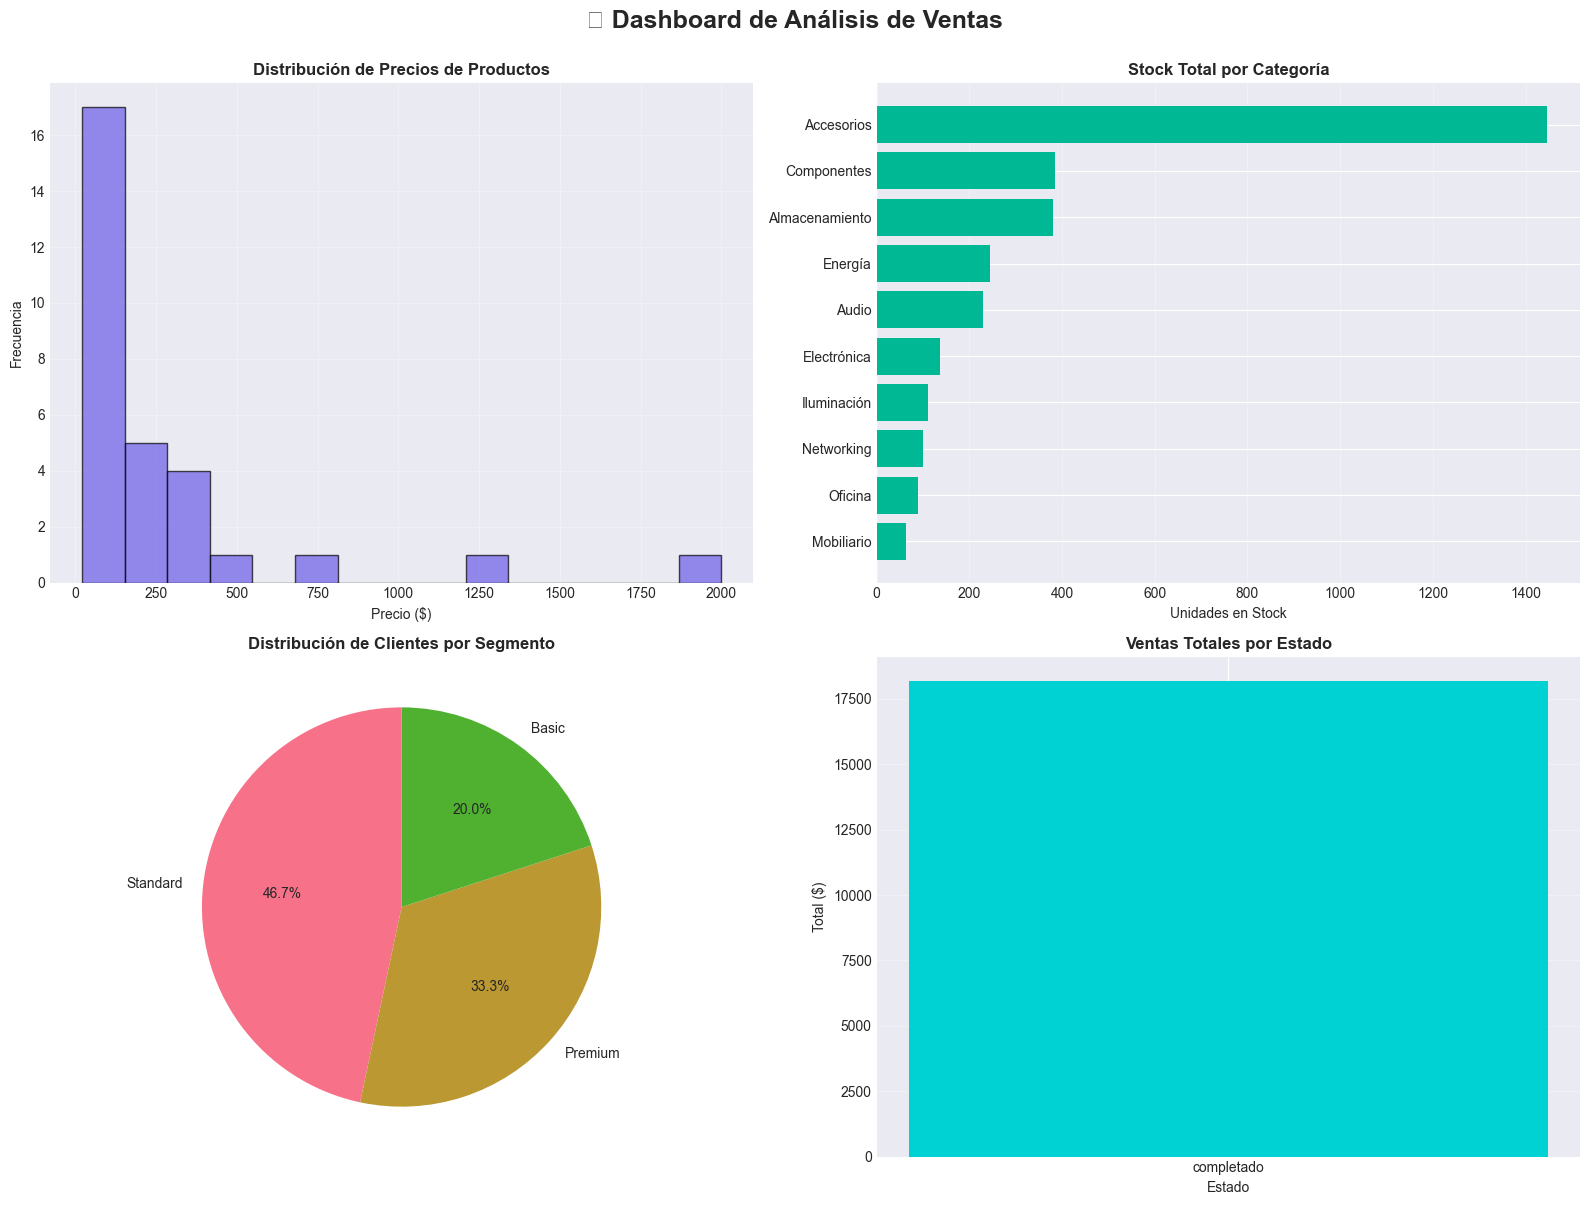

In [11]:
# Crear figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Dashboard de Análisis de Ventas', fontsize=18, fontweight='bold', y=1.00)

# 1. Distribución de precios
axes[0, 0].hist(productos['precio'], bins=15, color='#6C5CE7', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Precios de Productos', fontweight='bold')
axes[0, 0].set_xlabel('Precio ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(alpha=0.3)

# 2. Stock por categoría
stock_categoria = productos.groupby('categoria')['stock'].sum().sort_values()
axes[0, 1].barh(stock_categoria.index, stock_categoria.values, color='#00B894')
axes[0, 1].set_title('Stock Total por Categoría', fontweight='bold')
axes[0, 1].set_xlabel('Unidades en Stock')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Clientes por segmento
segmentos = clientes['segmento'].value_counts()
axes[1, 0].pie(segmentos.values, labels=segmentos.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribución de Clientes por Segmento', fontweight='bold')

# 4. Ventas por estado
ventas_estado = ventas.groupby('estado')['total'].sum()
axes[1, 1].bar(ventas_estado.index, ventas_estado.values, color=['#00D2D3', '#55EFC4', '#FD79A8'])
axes[1, 1].set_title('Ventas Totales por Estado', fontweight='bold')
axes[1, 1].set_xlabel('Estado')
axes[1, 1].set_ylabel('Total ($)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 📐 Subplots: Múltiples Gráficos en un Dashboard

**Concepto:** `plt.subplots()` crea una cuadrícula de gráficos para comparaciones lado a lado.

**Sintaxis:**
```python
fig, axes = plt.subplots(nrows, ncols, figsize=(...))
axes[row, col].plot(...)  # Acceso individual
```

**Ventajas:**
- Comparación directa de métricas relacionadas
- Dashboard compacto en una sola figura
- Presentaciones profesionales

**Uso:** Reportes ejecutivos, análisis multivariable, monitoreo de KPIs.

## 4. Seaborn: Visualización Estadística

Seaborn facilita la creación de gráficos estadísticos complejos.

### 4.1 Box Plot - Análisis de Distribución

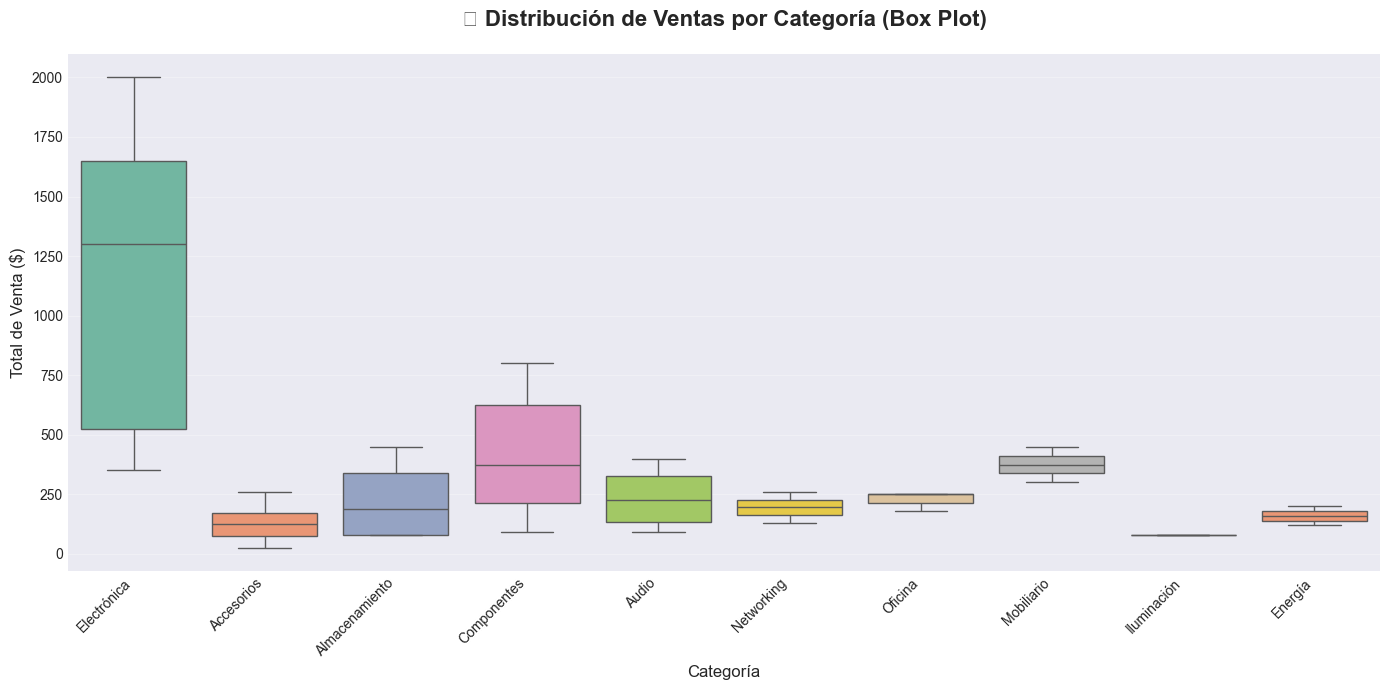


📊 Estadísticas por categoría:
                   mean      50%     std
categoria                               
Accesorios       127.31   124.95   70.09
Almacenamiento   227.48   189.98  180.98
Audio            234.98   224.98  141.06
Componentes      419.99   374.99  261.83
Electrónica     1142.85  1299.99  703.82
Energía          159.98   159.98   56.59
Iluminación       79.98    79.98     NaN
Mobiliario       374.99   374.99  106.07
Networking       194.98   194.98   91.92
Oficina          226.66   249.99   40.41


In [12]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=ventas_productos, x='categoria', y='total', palette='Set2')
plt.title('📦 Distribución de Ventas por Categoría (Box Plot)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Total de Venta ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Estadísticas por categoría:")
print(ventas_productos.groupby('categoria')['total'].describe()[['mean', '50%', 'std']].round(2))

### 📦 Box Plot: Visualización de Distribución y Outliers

**Concepto:** Muestra distribución mediante cuartiles, identifica valores atípicos de forma visual.

**Componentes:**
- **Caja:** rango IQR (Q1 a Q3), contiene el 50% central de los datos
- **Línea central:** mediana (Q2)
- **Bigotes:** extensión hasta 1.5×IQR
- **Puntos:** outliers más allá de los bigotes

**Ventaja sobre histograma:** Compara múltiples grupos en un espacio reducido.

**Uso:** Detección de outliers, comparación de distribuciones entre categorías.

### 4.2 Violin Plot - Densidad y Distribución

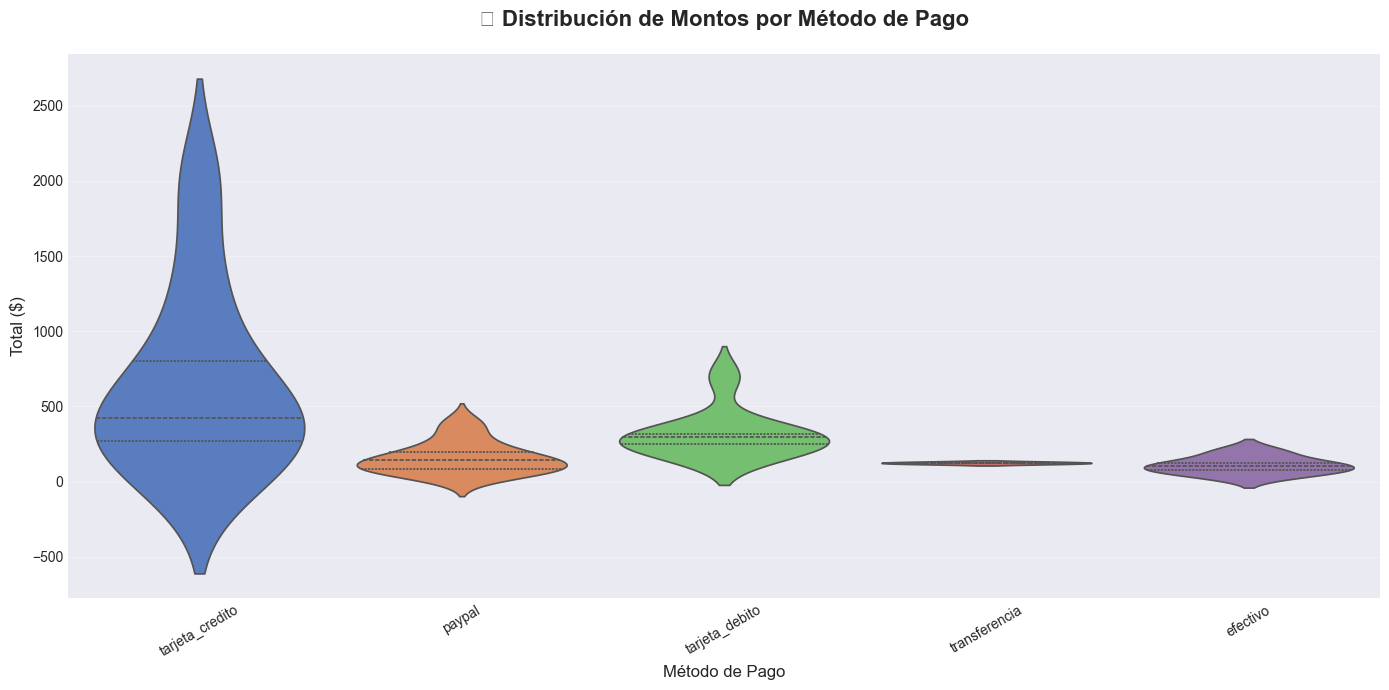

In [13]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=ventas, x='metodo_pago', y='total', palette='muted', inner='quartile')
plt.title('🎻 Distribución de Montos por Método de Pago', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Total ($)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 🎻 Violin Plot: Densidad de Distribución

**Concepto:** Combina box plot con gráfico de densidad (KDE) para mostrar forma completa de la distribución.

**Componentes:**
- **Forma externa:** densidad de probabilidad (ancho = frecuencia)
- **Inner quartile:** muestra cuartiles como en box plot
- **Área más ancha:** mayor concentración de datos

**Ventaja:** Revela múltiples picos (distribuciones bimodales) que box plots ocultan.

**Uso:** Análisis de segmentos de clientes, comparación de comportamientos entre grupos.

### 4.3 Heatmap - Matriz de Correlación

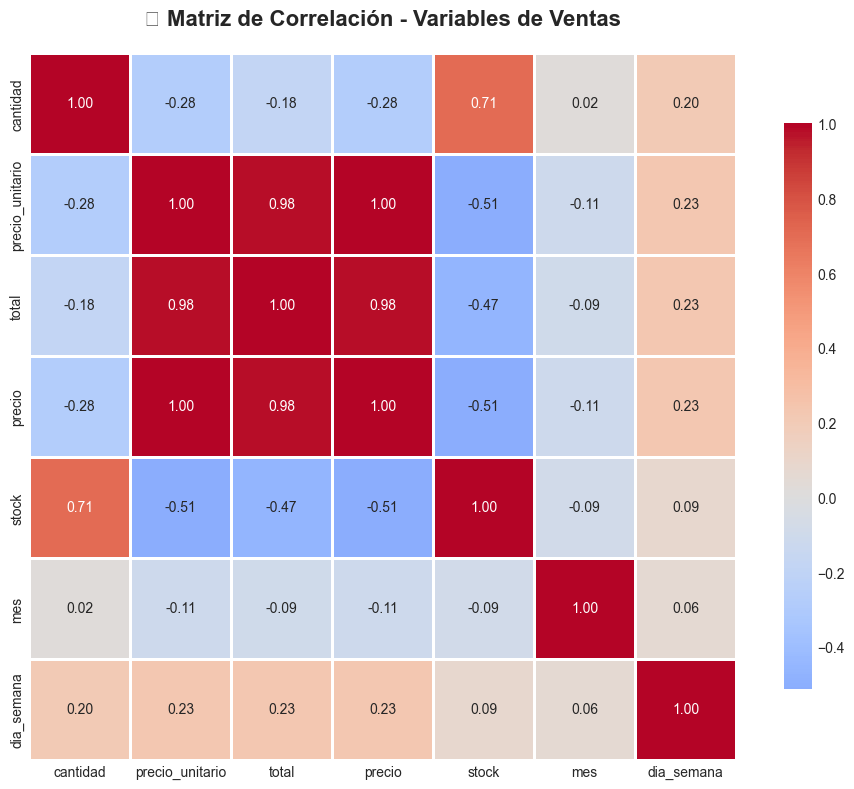


🔍 Correlaciones más fuertes:
precio_unitario  total              0.978433
precio           total              0.978433
total            precio_unitario    0.978433
                 precio             0.978433
stock            cantidad           0.705385
dtype: float64


In [14]:
# Preparar datos para correlación
ventas_productos['mes'] = ventas_productos['fecha_venta'].dt.month
ventas_productos['dia_semana'] = ventas_productos['fecha_venta'].dt.dayofweek

# Seleccionar columnas numéricas
columnas_numericas = ['cantidad', 'precio_unitario', 'total', 'precio', 'stock', 'mes', 'dia_semana']
correlacion = ventas_productos[columnas_numericas].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('🔥 Matriz de Correlación - Variables de Ventas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Correlaciones más fuertes:")
# Obtener correlaciones sin la diagonal
corr_values = correlacion.abs().unstack()
corr_values = corr_values[corr_values < 1]
print(corr_values.sort_values(ascending=False).head(5))

### 🔥 Heatmap: Matriz de Correlación

**Concepto:** Visualiza correlaciones entre variables numéricas mediante escala de color.

**Interpretación:**
- **Valores cercanos a +1:** correlación positiva fuerte (aumentan juntas)
- **Valores cercanos a -1:** correlación negativa fuerte (una sube, otra baja)
- **Valores cercanos a 0:** sin correlación lineal

**Parámetros clave:**
- `annot=True`: muestra valores numéricos
- `cmap='coolwarm'`: paleta divergente (rojo-azul)
- `center=0`: centra escala en cero

**Uso:** Feature selection para ML, análisis de multicolinealidad, exploración de relaciones.

### 4.4 Pair Plot - Relaciones entre Variables

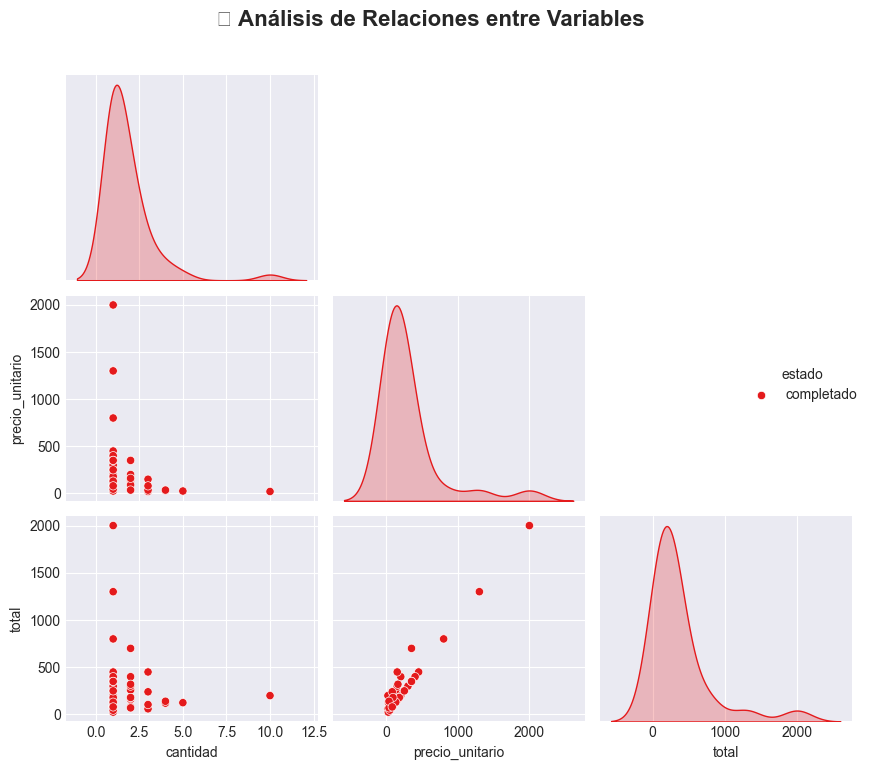

In [15]:
# Crear subset de datos
datos_pairplot = ventas_productos[['cantidad', 'precio_unitario', 'total', 'estado']].copy()

# Crear pairplot
sns.pairplot(datos_pairplot, hue='estado', palette='Set1', diag_kind='kde', corner=True)
plt.suptitle('📊 Análisis de Relaciones entre Variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 🔍 Pair Plot: Relaciones Múltiples

**Concepto:** Matriz de scatter plots mostrando todas las combinaciones de variables numéricas.

**Componentes:**
- **Diagonal:** distribución de cada variable (histograma o KDE)
- **Fuera diagonal:** scatter plots entre pares de variables
- **Parámetro `hue`:** colorea por categoría revelando patrones por grupo

**Ventaja:** Identifica rápidamente relaciones y clusters en datasets multivariables.

**Uso:** Análisis exploratorio inicial, selección de features, detección de separabilidad entre clases.

### 4.5 Count Plot - Frecuencia de Categorías

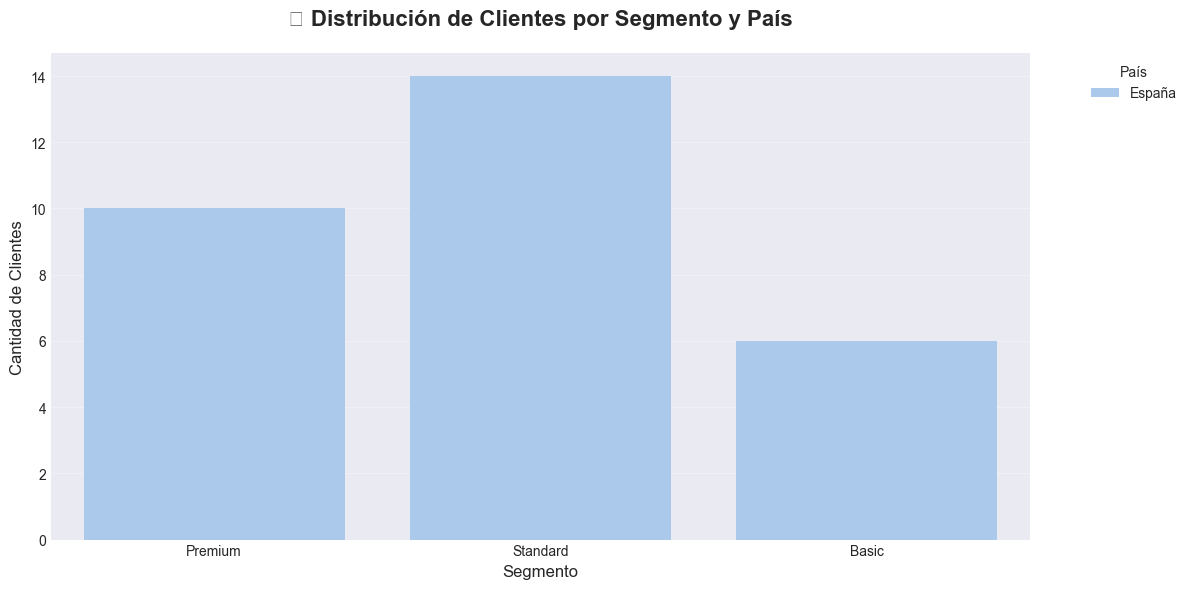

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=clientes, x='segmento', hue='pais', palette='pastel')
plt.title('👥 Distribución de Clientes por Segmento y País', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Plotly: Gráficos Interactivos

Plotly permite crear visualizaciones interactivas para dashboards web.

### 5.1 Scatter Plot Interactivo

In [29]:
fig = px.scatter(ventas_productos, 
                 x='precio', 
                 y='total',
                 size='cantidad',
                 color='categoria',
                 hover_data=['producto', 'metodo_pago'],
                 title='💎 Relación Precio vs Total de Venta (Interactivo)',
                 labels={'precio': 'Precio Unitario ($)', 'total': 'Total de Venta ($)'},
                 template='plotly_white')

fig.update_layout(height=600, font=dict(size=12))
fig.show()

print("💡 Tip: Pasa el mouse sobre los puntos para ver detalles")

💡 Tip: Pasa el mouse sobre los puntos para ver detalles


### 💎 Plotly: Gráficos Interactivos

**Concepto:** Plotly genera visualizaciones HTML interactivas con zoom, pan, hover y exportación.

**Ventajas sobre Matplotlib:**
- **Interactividad:** exploración dinámica de datos
- **Tooltips:** información detallada al pasar el mouse
- **Zoom/Pan:** navegación fluida en grandes datasets
- **Exportación:** PNG, SVG directamente del navegador

**API Principal:**
- `plotly.express (px)`: interfaz simple estilo ggplot
- `graph_objects (go)`: control granular avanzado

**Uso ideal:** Dashboards web, reportes ejecutivos interactivos, aplicaciones de datos.

### 5.2 Gráfico de Líneas con Animación

In [18]:
# Preparar datos para serie temporal
ventas_diarias_completo = ventas.copy()
ventas_diarias_completo['mes'] = ventas_diarias_completo['fecha_venta'].dt.to_period('M').astype(str)
ventas_diarias_completo = ventas_diarias_completo.sort_values('fecha_venta')

fig = px.line(ventas_diarias_completo, 
              x='fecha_venta', 
              y='total',
              color='metodo_pago',
              title='📈 Evolución de Ventas por Método de Pago',
              labels={'fecha_venta': 'Fecha', 'total': 'Total ($)', 'metodo_pago': 'Método de Pago'},
              template='plotly_dark')

fig.update_traces(mode='lines+markers')
fig.update_layout(height=600, hovermode='x unified')
fig.show()

### 5.3 Gráfico de Barras Apiladas

In [19]:
# Agrupar por categoría y estado
ventas_cat_estado = ventas_productos.groupby(['categoria', 'estado'])['total'].sum().reset_index()

fig = px.bar(ventas_cat_estado, 
             x='categoria', 
             y='total',
             color='estado',
             title='📊 Ventas por Categoría y Estado (Apiladas)',
             labels={'categoria': 'Categoría', 'total': 'Total Ventas ($)', 'estado': 'Estado'},
             template='seaborn',
             barmode='stack')

fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()

### 📊 Barras Apiladas: Composición por Categorías

**Concepto:** Muestra contribución de subcategorías al total de cada categoría principal.

**Parámetro clave:**
- `barmode='stack'`: apila barras verticalmente
- `barmode='group'`: barras lado a lado (comparación directa)

**Ventaja:** Revela simultáneamente total por categoría y composición interna.

**Uso:** Análisis de composición, desglose de métricas por múltiples dimensiones.

### 5.4 Sunburst Chart - Jerarquía de Ventas

In [20]:
# Preparar datos jerárquicos
jerarquia_ventas = ventas_productos.groupby(['categoria', 'producto'])['total'].sum().reset_index()

fig = px.sunburst(jerarquia_ventas, 
                  path=['categoria', 'producto'], 
                  values='total',
                  title='☀️ Jerarquía de Ventas: Categoría → Producto',
                  template='ggplot2')

fig.update_layout(height=700)
fig.show()

print("💡 Tip: Haz clic en las secciones para explorar la jerarquía")

💡 Tip: Haz clic en las secciones para explorar la jerarquía


### ☀️ Sunburst Chart: Visualización Jerárquica

**Concepto:** Gráfico circular que muestra jerarquías anidadas, cada nivel representa un nivel de agregación.

**Características:**
- **Centro:** nivel más alto de jerarquía (categorías)
- **Anillos exteriores:** niveles más detallados (subcategorías, productos)
- **Tamaño de sector:** proporcional al valor de la métrica
- **Interactividad:** clic para drill-down

**Uso:** Estructuras organizacionales, presupuestos jerárquicos, taxonomías de productos.

### 5.5 Dashboard con Múltiples Gráficos

In [21]:
# Crear subplot con 4 gráficos
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Ventas Diarias', 'Métodos de Pago', 'Top Productos', 'Ventas por Estado'),
    specs=[[{'type': 'scatter'}, {'type': 'pie'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# 1. Línea de ventas diarias
ventas_dia = ventas.groupby('fecha_venta')['total'].sum().reset_index()
fig.add_trace(
    go.Scatter(x=ventas_dia['fecha_venta'], y=ventas_dia['total'], mode='lines+markers', name='Ventas'),
    row=1, col=1
)

# 2. Pie chart de métodos de pago
metodos = ventas['metodo_pago'].value_counts()
fig.add_trace(
    go.Pie(labels=metodos.index, values=metodos.values, name='Métodos'),
    row=1, col=2
)

# 3. Top productos
top_productos = ventas_productos.groupby('producto')['total'].sum().nlargest(5)
fig.add_trace(
    go.Bar(x=top_productos.values, y=top_productos.index, orientation='h', name='Top Productos'),
    row=2, col=1
)

# 4. Ventas por estado
ventas_estado = ventas.groupby('estado')['total'].sum()
fig.add_trace(
    go.Bar(x=ventas_estado.index, y=ventas_estado.values, name='Estados'),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    title_text='📊 Dashboard Ejecutivo de Ventas',
    title_font_size=20,
    showlegend=False,
    height=800,
    template='plotly_white'
)

fig.show()

print("✅ Dashboard interactivo generado correctamente")

✅ Dashboard interactivo generado correctamente


## 6. Mejores Prácticas de Visualización

### 6.1 Principios de Diseño

In [22]:
print("""
✅ MEJORES PRÁCTICAS PARA VISUALIZACIÓN DE DATOS

1. 🎯 CLARIDAD
   • Título descriptivo y claro
   • Etiquetas en los ejes
   • Leyendas cuando sea necesario
   • Unidades explícitas

2. 🎨 COLOR
   • Usar paletas accesibles (color-blind friendly)
   • Máximo 5-7 colores diferentes
   • Colores consistentes entre gráficos
   • Alto contraste para legibilidad

3. 📊 TIPO DE GRÁFICO ADECUADO
   • Líneas: Tendencias temporales
   • Barras: Comparaciones entre categorías
   • Scatter: Relaciones entre variables
   • Pie: Proporciones (máximo 5 categorías)
   • Heatmap: Matrices y correlaciones

4. 📏 ESCALAS
   • Empezar eje Y en cero (barras)
   • Escala logarítmica para rangos amplios
   • Evitar distorsiones

5. 📝 ANOTACIONES
   • Resaltar puntos importantes
   • Agregar contexto cuando sea necesario
   • Líneas de referencia (promedios, metas)

6. 🎭 SIMPLICIDAD
   • Eliminar elementos innecesarios
   • Una idea principal por gráfico
   • Evitar 3D sin motivo
   • Reducir chartjunk

7. 📱 INTERACTIVIDAD (Web)
   • Tooltips informativos
   • Zoom y pan cuando sea útil
   • Filtros dinámicos
   • Exportación de datos
""")


✅ MEJORES PRÁCTICAS PARA VISUALIZACIÓN DE DATOS

1. 🎯 CLARIDAD
   • Título descriptivo y claro
   • Etiquetas en los ejes
   • Leyendas cuando sea necesario
   • Unidades explícitas

2. 🎨 COLOR
   • Usar paletas accesibles (color-blind friendly)
   • Máximo 5-7 colores diferentes
   • Colores consistentes entre gráficos
   • Alto contraste para legibilidad

3. 📊 TIPO DE GRÁFICO ADECUADO
   • Líneas: Tendencias temporales
   • Barras: Comparaciones entre categorías
   • Scatter: Relaciones entre variables
   • Pie: Proporciones (máximo 5 categorías)
   • Heatmap: Matrices y correlaciones

4. 📏 ESCALAS
   • Empezar eje Y en cero (barras)
   • Escala logarítmica para rangos amplios
   • Evitar distorsiones

5. 📝 ANOTACIONES
   • Resaltar puntos importantes
   • Agregar contexto cuando sea necesario
   • Líneas de referencia (promedios, metas)

6. 🎭 SIMPLICIDAD
   • Eliminar elementos innecesarios
   • Una idea principal por gráfico
   • Evitar 3D sin motivo
   • Reducir chartjunk

7. 📱 I

### 6.2 Comparación: Gráfico Malo vs Bueno

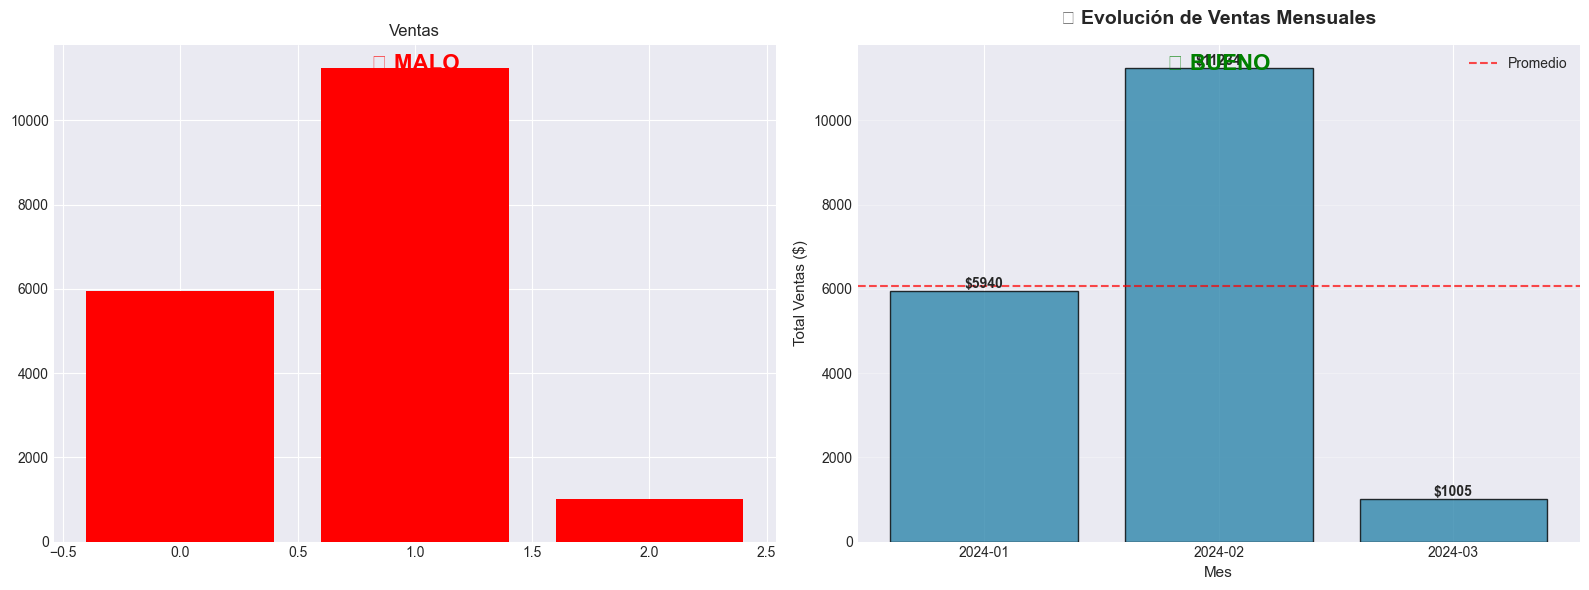


🔍 Diferencias clave:

❌ MALO:
  • Sin etiquetas en ejes
  • Título genérico
  • Color agresivo sin contraste
  • Sin contexto (promedio, valores)
  • Sin grid para referencia

✅ BUENO:
  • Título descriptivo con emoji
  • Etiquetas claras con unidades
  • Color profesional con contraste
  • Línea de promedio para contexto
  • Grid para facilitar lectura
  • Valores anotados



In [23]:
# Datos de ejemplo
ventas_mes = ventas_productos.groupby(ventas_productos['fecha_venta'].dt.to_period('M').astype(str))['total'].sum()

# MALO: Sin contexto, colores inapropiados, sin etiquetas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico MALO
ax1.bar(range(len(ventas_mes)), ventas_mes.values, color='red')
ax1.set_title('Ventas')
ax1.text(0.5, 0.95, '❌ MALO', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold', color='red', ha='center')

# Gráfico BUENO
ax2.bar(ventas_mes.index, ventas_mes.values, color='#2E86AB', edgecolor='black', alpha=0.8)
ax2.set_title('📊 Evolución de Ventas Mensuales', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Mes', fontsize=11)
ax2.set_ylabel('Total Ventas ($)', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=ventas_mes.mean(), color='red', linestyle='--', alpha=0.7, label='Promedio')

# Agregar valores en las barras
for i, v in enumerate(ventas_mes.values):
    ax2.text(i, v, f'${v:.0f}', ha='center', va='bottom', fontweight='bold')

ax2.legend()
ax2.text(0.5, 0.95, '✅ BUENO', transform=ax2.transAxes, 
         fontsize=16, fontweight='bold', color='green', ha='center')

plt.tight_layout()
plt.show()

print("""
🔍 Diferencias clave:

❌ MALO:
  • Sin etiquetas en ejes
  • Título genérico
  • Color agresivo sin contraste
  • Sin contexto (promedio, valores)
  • Sin grid para referencia

✅ BUENO:
  • Título descriptivo con emoji
  • Etiquetas claras con unidades
  • Color profesional con contraste
  • Línea de promedio para contexto
  • Grid para facilitar lectura
  • Valores anotados
""")

## 7. Caso Práctico: Dashboard Completo

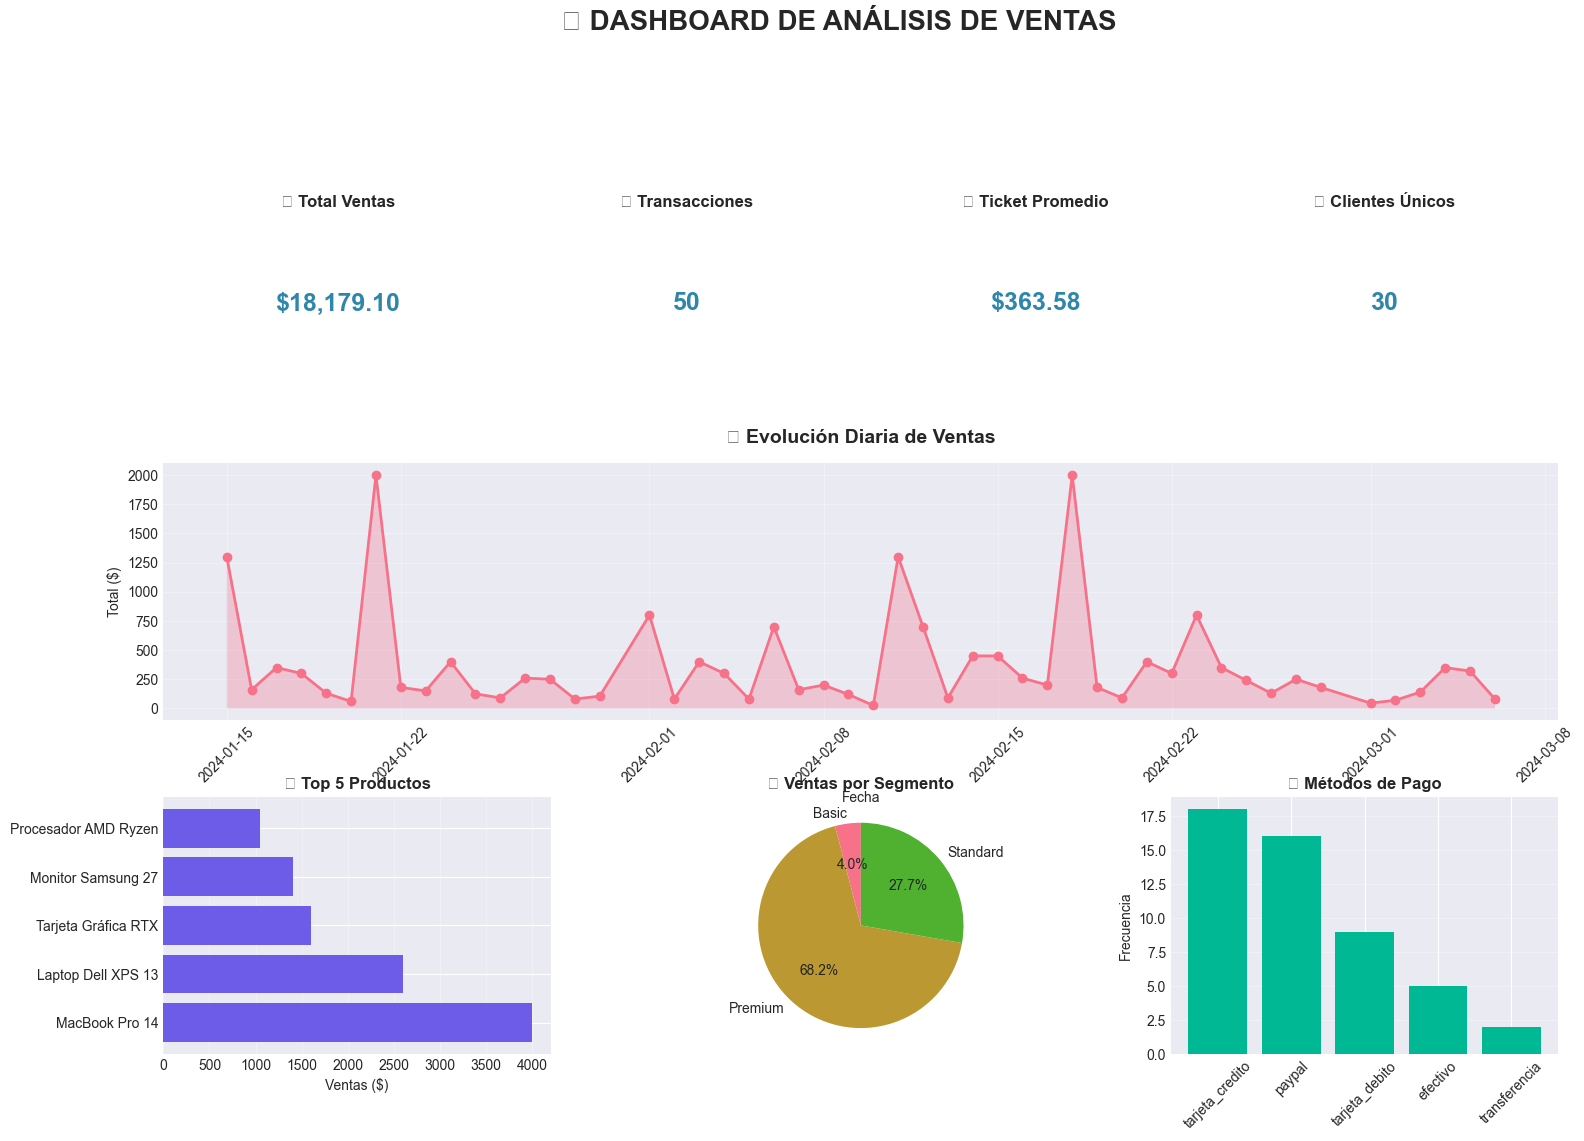


📊 RESUMEN EJECUTIVO

💰 Ventas Totales: $18,179.10
🛒 Total Transacciones: 50
📊 Ticket Promedio: $363.58
👥 Clientes Únicos: 30

🏆 Producto más vendido: MacBook Pro 14 ($3999.98)
💳 Método de pago preferido: tarjeta_credito (18 transacciones)
👔 Segmento con más ventas: Premium ($12399.76)



In [32]:
# Función para crear dashboard profesional
def crear_dashboard_ventas(ventas_df, productos_df, clientes_df):
    """
    Crea un dashboard completo de análisis de ventas.
    """
    # Crear producto_id en productos si no existe
    productos_con_id = productos_df.copy()
    if 'producto_id' not in productos_con_id.columns:
        productos_con_id['producto_id'] = range(1, len(productos_con_id) + 1)
    
    # Merge de datos
    datos_completos = ventas_df.merge(
        productos_con_id, on='producto_id'
    ).merge(
        clientes_df, on='cliente_id'
    )
    
    # Crear figura
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. KPIs principales (arriba)
    ax_kpi = fig.add_subplot(gs[0, :])
    ax_kpi.axis('off')
    
    # Calcular KPIs
    total_ventas = datos_completos['total'].sum()
    num_transacciones = len(datos_completos)
    ticket_promedio = total_ventas / num_transacciones
    num_clientes = datos_completos['cliente_id'].nunique()
    
    kpis = [
        ('💰 Total Ventas', f'${total_ventas:,.2f}'),
        ('🛒 Transacciones', f'{num_transacciones:,}'),
        ('📊 Ticket Promedio', f'${ticket_promedio:.2f}'),
        ('👥 Clientes Únicos', f'{num_clientes:,}')
    ]
    
    for i, (titulo, valor) in enumerate(kpis):
        x_pos = 0.125 + i * 0.25
        ax_kpi.text(x_pos, 0.7, titulo, ha='center', fontsize=12, fontweight='bold')
        ax_kpi.text(x_pos, 0.3, valor, ha='center', fontsize=18, fontweight='bold', color='#2E86AB')
    
    # 2. Evolución temporal
    ax1 = fig.add_subplot(gs[1, :])
    ventas_diarias = datos_completos.groupby('fecha_venta')['total'].sum()
    ax1.plot(ventas_diarias.index, ventas_diarias.values, marker='o', linewidth=2, markersize=6)
    ax1.fill_between(ventas_diarias.index, ventas_diarias.values, alpha=0.3)
    ax1.set_title('📈 Evolución Diaria de Ventas', fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Total ($)')
    ax1.grid(alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 3. Top productos
    ax2 = fig.add_subplot(gs[2, 0])
    top_prods = datos_completos.groupby('producto')['total'].sum().nlargest(5)
    ax2.barh(top_prods.index, top_prods.values, color='#6C5CE7')
    ax2.set_title('🏆 Top 5 Productos', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Ventas ($)')
    ax2.grid(axis='x', alpha=0.3)
    
    # 4. Segmentos de clientes
    ax3 = fig.add_subplot(gs[2, 1])
    segmentos_ventas = datos_completos.groupby('segmento')['total'].sum()
    ax3.pie(segmentos_ventas.values, labels=segmentos_ventas.index, autopct='%1.1f%%', startangle=90)
    ax3.set_title('👥 Ventas por Segmento', fontsize=12, fontweight='bold')
    
    # 5. Métodos de pago
    ax4 = fig.add_subplot(gs[2, 2])
    metodos = datos_completos['metodo_pago'].value_counts()
    ax4.bar(metodos.index, metodos.values, color='#00B894')
    ax4.set_title('💳 Métodos de Pago', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Frecuencia')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3)
    
    # Título principal
    fig.suptitle('📊 DASHBOARD DE ANÁLISIS DE VENTAS', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    plt.show()
    
    # Resumen estadístico
    print("\n" + "="*60)
    print("📊 RESUMEN EJECUTIVO")
    print("="*60)
    print(f"\n💰 Ventas Totales: ${total_ventas:,.2f}")
    print(f"🛒 Total Transacciones: {num_transacciones:,}")
    print(f"📊 Ticket Promedio: ${ticket_promedio:.2f}")
    print(f"👥 Clientes Únicos: {num_clientes:,}")
    print(f"\n🏆 Producto más vendido: {top_prods.index[0]} (${top_prods.values[0]:.2f})")
    print(f"💳 Método de pago preferido: {metodos.index[0]} ({metodos.values[0]} transacciones)")
    print(f"👔 Segmento con más ventas: {segmentos_ventas.idxmax()} (${segmentos_ventas.max():.2f})")
    print("\n" + "="*60)

# Ejecutar dashboard
crear_dashboard_ventas(ventas, productos, clientes)

## 8. Exportación de Gráficos

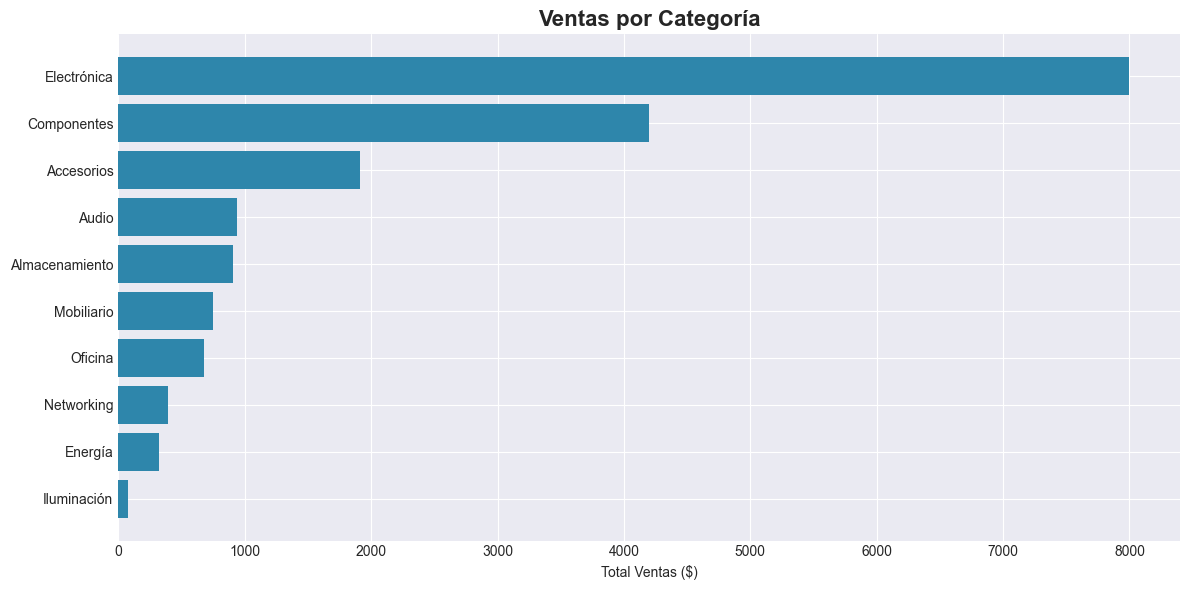

✅ Gráficos exportados a: ../../outputs/visualizaciones
📁 Formatos: PNG (300 DPI), PDF, SVG


In [33]:
# Crear directorio de salida si no existe
import os
output_dir = '../../outputs/visualizaciones'
os.makedirs(output_dir, exist_ok=True)

# Ejemplo: Guardar gráfico en alta resolución
plt.figure(figsize=(12, 6))
ventas_categoria = ventas_productos.groupby('categoria')['total'].sum().sort_values()
plt.barh(ventas_categoria.index, ventas_categoria.values, color='#2E86AB')
plt.title('Ventas por Categoría', fontsize=16, fontweight='bold')
plt.xlabel('Total Ventas ($)')
plt.tight_layout()

# Guardar en diferentes formatos
plt.savefig(f'{output_dir}/ventas_categoria.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{output_dir}/ventas_categoria.pdf', bbox_inches='tight')
plt.savefig(f'{output_dir}/ventas_categoria.svg', bbox_inches='tight')
plt.show()

print(f"✅ Gráficos exportados a: {output_dir}")
print("📁 Formatos: PNG (300 DPI), PDF, SVG")

## 🎯 Ejercicios Prácticos

### Ejercicio 1: Dashboard Personalizado
Crea un dashboard con los siguientes gráficos:
1. Histograma de distribución de edades de clientes
2. Box plot de ventas por país
3. Heatmap de ventas por día de la semana y hora
4. Sunburst de categoría → producto → método de pago

In [ ]:
# TU CÓDIGO AQUÍ

### Ejercicio 2: Análisis Temporal
Crea una visualización que muestre:
- Ventas acumuladas a lo largo del tiempo
- Promedio móvil de 7 días
- Identificar tendencias alcistas/bajistas

In [ ]:
# TU CÓDIGO AQUÍ

### Ejercicio 3: Visualización Interactiva
Usa Plotly para crear un dashboard interactivo con:
- Filtros por categoría y rango de fechas
- Gráficos que se actualicen dinámicamente
- Tooltips personalizados con información relevante

In [ ]:
# TU CÓDIGO AQUÍ

## 📚 Recursos Adicionales

### Documentación
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Plotly Python](https://plotly.com/python/)

### Inspiración
- [From Data to Viz](https://www.data-to-viz.com/)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Storytelling with Data](http://www.storytellingwithdata.com/)

### Librerías Avanzadas
- **Altair**: Visualización declarativa
- **Bokeh**: Gráficos interactivos para web
- **Plotnine**: Gráficos estilo ggplot2
- **Dash**: Frameworks para dashboards

---

## ✅ Resumen

En este notebook aprendiste:

1. ✅ **Matplotlib**: Gráficos estáticos personalizables (líneas, barras, pie, subplots)
2. ✅ **Seaborn**: Visualizaciones estadísticas (boxplot, violin, heatmap, pairplot)
3. ✅ **Plotly**: Gráficos interactivos para dashboards web
4. ✅ **Mejores prácticas**: Claridad, colores, tipos de gráficos, anotaciones
5. ✅ **Dashboards**: Combinar múltiples visualizaciones
6. ✅ **Exportación**: Guardar gráficos en alta calidad

**🎯 Próximo paso**: Control de versiones con Git

---

---

## 🧭 Navegación

**← Anterior:** [Limpieza y Preparación de Datos](05_limpieza_datos.ipynb)

**Siguiente →:** [🔄 Git y Control de Versiones para Ingeniería de Datos →](07_git_control_versiones.ipynb)

**📚 Índice de Nivel Junior:**
- [📊 Junior - 01. Introducción a la Ingeniería de Datos](01_introduccion_ingenieria_datos.ipynb)
- [🐍 Junior - 02. Python para Manipulación de Datos](02_python_manipulacion_datos.ipynb)
- [Pandas: Fundamentos para Análisis de Datos](03_pandas_fundamentos.ipynb)
- [SQL Básico para Ingeniería de Datos](04_sql_basico.ipynb)
- [Limpieza y Preparación de Datos](05_limpieza_datos.ipynb)
- [📊 Visualización de Datos en Ingeniería de Datos](06_visualizacion_datos.ipynb) ← 🔵 Estás aquí
- [🔄 Git y Control de Versiones para Ingeniería de Datos](07_git_control_versiones.ipynb)
- [🌐 APIs REST y Web Scraping para Ingeniería de Datos](08_apis_web_scraping.ipynb)
- [🎯 Proyecto Integrador 1: Pipeline ETL Completo](09_proyecto_integrador_1.ipynb)
- [🚀 Proyecto Integrador 2: Pipeline Near Real-Time, Scheduling y Alertas](10_proyecto_integrador_2.ipynb)

**🎓 Otros Niveles:**
- [Nivel Junior](../nivel_junior/README.md)
- [Nivel Mid](../nivel_mid/README.md)
- [Nivel Senior](../nivel_senior/README.md)
- [Nivel GenAI](../nivel_genai/README.md)
- [Negocio LATAM](../negocios_latam/README.md)
